In [1]:
import torch
print(torch.cuda.is_available()) # should be True
# t = torch.rand(10, 10).cuda()
# print(t.device) # should be CUDA]
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn.functional as F
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
import torchio as tio
from typing import List, Tuple
from numpy import ndarray
from nilearn.image import resample_to_img
from sklearn.model_selection import StratifiedKFold

True


In [9]:
# https://neuroimaging-data-science.org/content/005-nipy/003-transforms.html

head_nifti = nib.load('./../data/processed/preop/BTC-preop/sub-PAT08/t1_ants_aligned.nii.gz')
mask_nifti = nib.load('./../data/raw/preop/BTC-preop/derivatives/tumor_masks/sub-PAT08/anat/sub-PAT08_space_T1_label-tumor.nii')
mask_resampled = resample_to_img(mask_nifti, head_nifti, interpolation='nearest')

head_affine = head_nifti.affine
mask_affine = mask_resampled.affine
print(nib.aff2axcodes(head_affine))
print(nib.aff2axcodes(mask_affine))

('L', 'A', 'S')
('L', 'A', 'S')


In [18]:
head_data = head_nifti.get_fdata()
slice_index = 50  # Example slice index
head_slice = head_data[:, :, slice_index]
torch.tensor(head_slice).shape

torch.Size([160, 221])

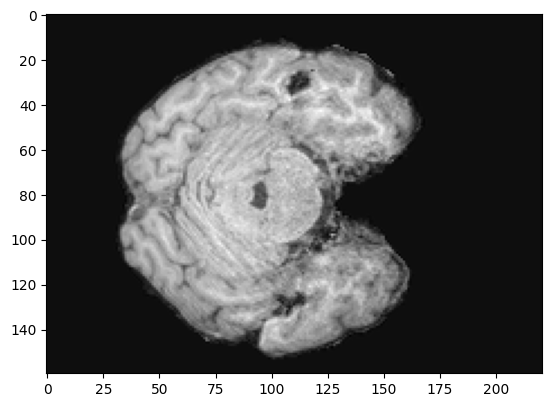

In [19]:
plt.imshow(head_slice, cmap='gray')

In [48]:
import torch
import torch.nn.functional as F
import random
torch.set_printoptions(threshold=10000)  # Set threshold high enough
import torch
import torch.nn.functional as F
import random

import torch
import torch.nn.functional as F
import random

class ShiftImage:
    def __init__(self, max_shift_x, max_shift_y):
        self.max_shift_x = max_shift_x
        self.max_shift_y = max_shift_y

    def __call__(self, tensor):
        # Generate random shifts within the specified range
        shift_x = random.randint(-self.max_shift_x, self.max_shift_x)
        shift_y = random.randint(-self.max_shift_y, self.max_shift_y)

        # Create a new tensor to hold the sheared values
        shifted_tensor = torch.zeros_like(tensor)

        # Fill the shifted_tensor based on the random shifts
        # Shift in x direction
        if shift_x > 0:
            shifted_tensor[:, shift_x:] = tensor[:, :-shift_x]  # Move right
            shifted_tensor[:, :shift_x] = tensor[:, 0:1].repeat(1, shift_x)  # Fill left with the border value
        elif shift_x < 0:
            shifted_tensor[:, :shift_x] = tensor[:, -shift_x:]  # Move left
            shifted_tensor[:, shift_x:] = tensor[:, -1:].repeat(1, -shift_x)  # Fill right with the border value

        # Shift in y direction
        if shift_y > 0:
            shifted_tensor[shift_y:, :] = shifted_tensor[:-shift_y, :]  # Move down
            shifted_tensor[:shift_y, :] = shifted_tensor[0:1, :].repeat(shift_y, 1)  # Fill up with the border value
        elif shift_y < 0:
            shifted_tensor[:shift_y, :] = shifted_tensor[-shift_y:, :]  # Move up
            shifted_tensor[shift_y:, :] = shifted_tensor[-1:, :].repeat(-shift_y, 1)  # Fill down with the border value

        return shifted_tensor


In [49]:
shift_image = ShiftImage(max_shift_x=100, max_shift_y=100)
shifted_image = shift_image(torch.tensor(head_slice))

torch.Size([160, 221])


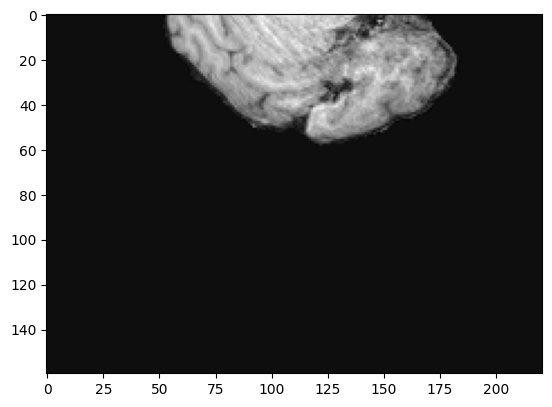

In [50]:
plt.imshow(shifted_image, cmap='gray')
print(shifted_image.shape)

(160, 221)


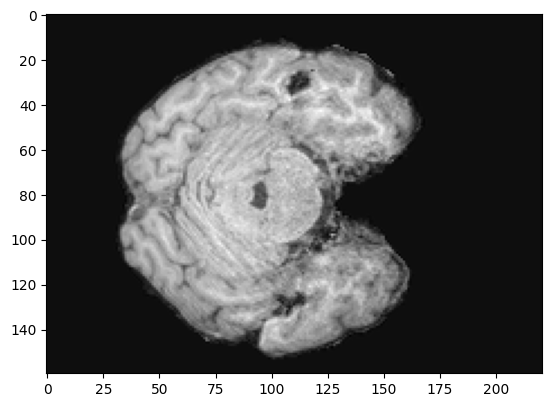

In [60]:
plt.imshow(head_slice, cmap='gray')
print(head_slice.shape)

In [75]:
import kornia
translation = torch.tensor([[100., 0.]]).double()
test = kornia.geometry.transform.translate(torch.tensor(head_slice).unsqueeze(0).double(), translation, mode='bilinear', padding_mode='border', align_corners=True)

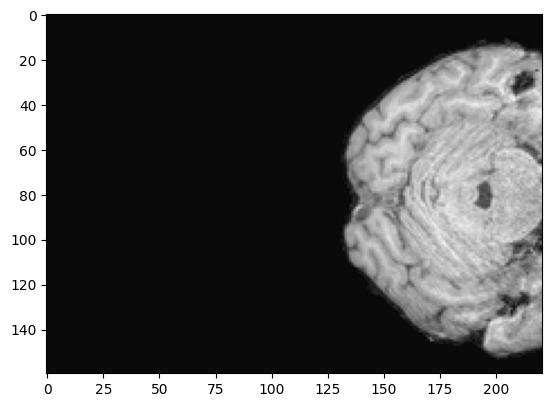

In [76]:
plt.imshow(test.squeeze(0).numpy(), cmap='gray')